### Loading Dataset and importing library

In [0]:
import tensorflow as tf
import numpy as np
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype("float32")/255.0

In [0]:
X_test = X_test.astype("float32")/255.0

In [0]:
epoch = 3
train_steps = 10000
batch_size = 32
learning_rate = 0.01
vector_size = 32
print_interval = 1000

In [0]:
def weights(shape):
  return tf.Variable(tf.random_normal(shape))
def biases(shape):
  return tf.Variable(tf.random_normal([shape]))
def dense(input_,out):
  w = weights([int(input_.shape[-1]),out])
  b = biases(out)
  # Input Times Weight, Add a Bias, Activate!
  return tf.nn.sigmoid(tf.matmul(input_,w)+b)

In [0]:
def build_model(x,vector_size):
  h = dense(x,256)
  vct = dense(h,vector_size)
  h = dense(vct,256)
  h = dense(h,28*28*1)
  return h,vct
x = tf.placeholder(tf.float32,[None,28*28*1])
output,vct = build_model(x,vector_size)
loss = tf.reduce_mean(tf.pow(x - output,2))
optimizer = tf.train.RMSPropOptimizer(learning_rate = learning_rate).minimize(loss)

In [0]:
#sess.close()

In [25]:
with tf.device("/gpu:0"):
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())
  len_ = len(X_train)
  for i in range(epoch):
    for j in range(train_steps):
      items = np.random.randint(0,len_,batch_size)
      _,l = sess.run([optimizer,loss],feed_dict={x:X_train[items].reshape(-1,28*28*1)})
      if not j%print_interval and j:
        print("EPOCH: %d Step: %d Loss: %f"%(i,j,l))
        #pass
      #print(l)
  #    break

EPOCH: 0 Step: 1000 Loss: 0.139214
EPOCH: 0 Step: 2000 Loss: 0.088544
EPOCH: 0 Step: 3000 Loss: 0.082643
EPOCH: 0 Step: 4000 Loss: 0.072782
EPOCH: 0 Step: 5000 Loss: 0.070039
EPOCH: 0 Step: 6000 Loss: 0.067858
EPOCH: 0 Step: 7000 Loss: 0.065149
EPOCH: 0 Step: 8000 Loss: 0.063290
EPOCH: 0 Step: 9000 Loss: 0.063418
EPOCH: 1 Step: 1000 Loss: 0.061258
EPOCH: 1 Step: 2000 Loss: 0.054222
EPOCH: 1 Step: 3000 Loss: 0.051948
EPOCH: 1 Step: 4000 Loss: 0.043873
EPOCH: 1 Step: 5000 Loss: 0.044612
EPOCH: 1 Step: 6000 Loss: 0.044351
EPOCH: 1 Step: 7000 Loss: 0.039956
EPOCH: 1 Step: 8000 Loss: 0.037443
EPOCH: 1 Step: 9000 Loss: 0.033966
EPOCH: 2 Step: 1000 Loss: 0.037110
EPOCH: 2 Step: 2000 Loss: 0.032699
EPOCH: 2 Step: 3000 Loss: 0.032825
EPOCH: 2 Step: 4000 Loss: 0.032073
EPOCH: 2 Step: 5000 Loss: 0.032010
EPOCH: 2 Step: 6000 Loss: 0.032540
EPOCH: 2 Step: 7000 Loss: 0.029813
EPOCH: 2 Step: 8000 Loss: 0.035080
EPOCH: 2 Step: 9000 Loss: 0.031956


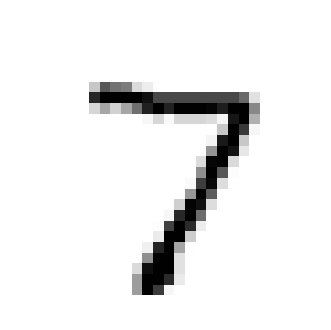

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])
plt.axis("off")
plt.show()

(1, 32)
(1, 784)
[[9.4979473e-15 9.9999988e-01 8.0465353e-01 4.1192635e-03 1.1231283e-02
  1.0000000e+00 1.0000000e+00 2.3763040e-09 2.3989128e-03 1.0000000e+00
  1.4185037e-01 3.2187391e-14 3.2788346e-16 3.2017612e-13 1.0000000e+00
  6.2193062e-10 9.9999940e-01 5.5855978e-01 1.0000000e+00 7.3248094e-17
  7.1903332e-09 3.0577513e-11 1.0000000e+00 1.6096340e-02 1.7529541e-01
  1.0000000e+00 4.6780116e-08 1.0000000e+00 2.5341762e-07 9.8699039e-01
  1.0000000e+00 1.0000000e+00]]


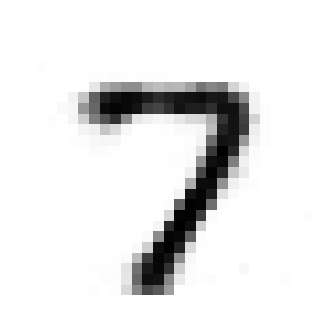

In [32]:
encoded = sess.run(vct,feed_dict = {x:X_test[0].reshape(1,28*28*1)})
o = sess.run(output,feed_dict={vct:encoded,x:X_test[0].reshape(1,28*28*1)})
print(encoded.shape)
print(o.shape)
o = o.reshape(28,28)*255
print(encoded)
plt.imshow(o)
plt.axis('off')
plt.show()

In [0]:
print(o.shape,)